# **Multivariate Standardized Drought Index (MSDI)**
**Tolga Barış Terzi – 2025**

This notebook demonstrates example calculations of the **Multivariate Standardized Drought Index (MSDI)** using **bivariate data** (e.g., precipitation and streamflow).  
MSDI extends the univariate standardized indices to account for **dependence between two hydrometeorological variables**.

---

## **MSDI Methodology Overview**

The following provides a step-by-step explanation of the **Multivariate Standardized Drought Index (MSDI)** calculation:

1. **Aggregation**  
   Accumulate each selected variable over the chosen time scale (e.g., 1, 3, 6, 12 months).

2. **Marginal Probability Calculation**  
   Compute marginal probabilities for each variable using either the **Weibull (1951)** or **Gringorten (1963)** plotting position formula, or from **probability density functions**.  
   This standardizes the data to a uniform distribution in the interval [0,1].

3. **Copula Fitting**  
   Fit the selected **copula family** to the standardized data and estimate the copula parameters.

4. **Joint CDF Construction**  
   Construct the **cumulative distribution function (CDF)** to obtain the **joint cumulative probability**.  
   - **Copula-based MSDI**: use the fitted copula functions.  
   - **Empirical MSDI**: use bivariate plotting position formulas.

5. **Standardization**  
   Transform the cumulative probabilities into **standard normal quantiles** using the inverse of the standard normal distribution function.

---

## **Required Packages**


In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import pydrght

---
## **Load the Data**

The example dataset contains monthly values of:

- **Streamflow**  
- **Precipitation**  

The data is from the **Seyhan River Basin, Turkey**, covering the period **October 1964 – September 2011**, which corresponds to hydrological years **1965–2011**.

In [ ]:
df = pd.read_csv("data.csv", index_col=0, parse_dates=True)
display(df.head())

,STREAMFLOW,PRECIPITATION,MINT,MAXT,MEANT,PET
DATE,,,,,,
1964-10-01,10.5,46.67,2.0,22.7,12.0,95.471
1964-11-01,11.0,99.70,-1.7,12.3,5.0,43.318
1964-12-01,12.5,64.70,-4.1,4.1,-0.4,22.320
1965-01-01,12.3,41.00,-5.0,3.0,-1.4,22.607
1965-02-01,15.8,104.50,-6.9,3.4,-2.1,29.121


---
## **Calculate Multivariate Standardized Drought Index (MSDI)**

This notebook demonstrates example calculations of **Multivariate Standardized Drought Index (MSDI)** using **bivariate data**, such as precipitation and streamflow.  

MSDI extends standardized indices to consider **joint behavior of two variables** using either:

- **Parametric (copula-based) MSDI**, or  
- **Empirical (bivariate plotting position) MSDI**.

---

### **Calculate Copula-Based MSDI**

For this example, we will use **two hydrometeorological variables** (e.g., precipitation and streamflow) to calculate copula-based MSDI.  

Other combinations, such as soil moisture and groundwater, can also be used.

It is common to calculate MSDI at different **time scales**: 1, 3, 6, 9, and 12 months.  

In this example, we will calculate:

- **MSDI-12 (parametric)** using a selected **copula family** to model the joint distribution.  

=== Copula-Based MSDI ===


0   -0.632601
1   -0.583776
2   -0.703773
3   -0.321812
4    0.612748
dtype: float64

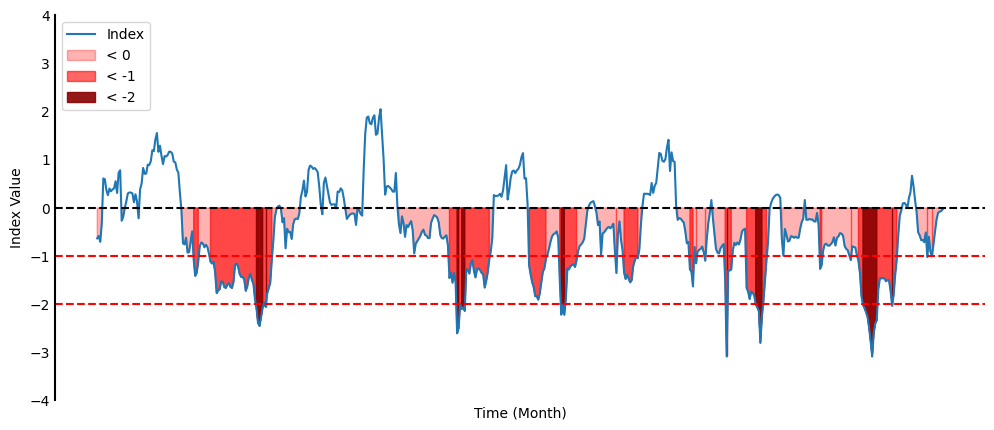

In [4]:
# Select precipitation and streamflow columns
precip = df['PRECIPITATION']
streamflow = df['STREAMFLOW']

# Initialize MSDI class with 12-month accumulation
MSDI = pydrght.MSDI(precip, streamflow, ts=12)

# Compute copula-based MSDI (Clayton copula, Gringorten method)
MSDI_cop = MSDI.parametric(copula_family="Clayton", method="Gringorten")

# Display results
print("=== Copula-Based MSDI ===")
display(MSDI_cop.head())

pydrght.utils.plot_index_with_severity(MSDI_cop)

---

### **Calculate Empirical MSDI**

For this example, we will use **two hydrometeorological variables** (e.g., precipitation and streamflow) to calculate empirical MSDI.  

It is common to calculate MSDI at different **time scales**: 1, 3, 6, 9, and 12 months.  

In this example, we will calculate:

- **MSDI-12 (empirical)** using **bivariate Gringorten plotting position formula** to model the joint distribution. 

=== Empirical MSDI ===


0   -0.623270
1   -0.541691
2   -0.605772
3   -0.191387
4    0.605772
dtype: float64

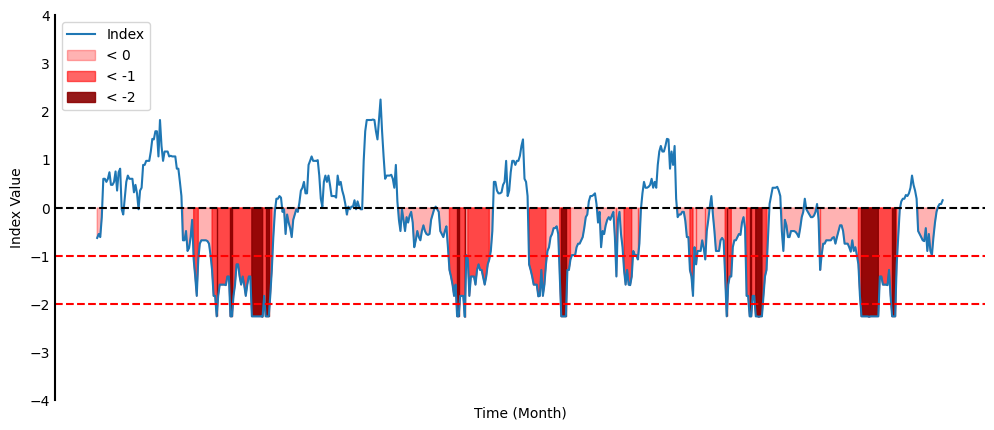

In [5]:
# Select precipitation and streamflow columns
precip = df['PRECIPITATION']
streamflow = df['STREAMFLOW']

# Initialize MSDI class with 12-month accumulation
MSDI = pydrght.MSDI(precip, streamflow, ts=12)

# Compute empirical MSDI (Clayton copula, Gringorten method)
MSDI_emp = MSDI.empirical()

# Display results
print("=== Empirical MSDI ===")
display(MSDI_emp.head())

pydrght.utils.plot_index_with_severity(MSDI_emp)

---
## **References**
- Gringorten, I. I. (1963). *A plotting rule for extreme probability paper.* Journal of Geophysical Research, 68(3), 813–814.
- Weibull, W. (1939). *A statistical distribution function of wide applicability.* Journal of Applied Mechanics, 18, 293–297.
- Clayton, D. G. (1978). *A model for association in bivariate life tables and its application in epidemiological studies of familial tendency in chronic disease incidence.* Biometrika, 65(1), 141–151.
- Frank, M. J. (1979). *On the simultaneous associativity of F-matrices.* Biometrika, 66(2), 425–430.
- Gumbel, E. J. (1960). *Bivariate exponential distributions.* Journal of the American Statistical Association, 55(290), 698–707.
- Galambos, J. (1987). *The asymptotic theory of extreme order statistics.* Robert E. Krieger Publishing Company.
- Plackett, R. L. (1965). *A class of bivariate distributions.* Journal of the American Statistical Association, 60(310), 516–522.
---
